# Summary

* The data originates from IBM's HR department. I utilize this dataset to determine the key factors contributing to employee turnover. To identify these factors, we formulate hypotheses for each and employ SPSS for statistical analysis, using the chi-square test for categorical variables and the independent sample t-test for continuous ones. The statistical findings provide insights into the reasons for attrition. I've processed the data for all variables. Continuous variables are standardized to negate the impact of varying scales. For binary categorical variables, I apply one-hot encoding, and for those with more than two levels, I use frequency encoding. This encoding simplifies the model. I then employ these factors to develop various machine learning models such as logistic regression, LDA, KNN, random forest, and decision tree. After partitioning the data into training and test sets, I  address the issue of imbalanced samples to mitigate potential biases. The optimal model is chosen based on a confusion matrix that maximizes true positives and minimizes false negatives, indicating its superior predictive capability for identifying potential departures. The logistic regression model proves to be the best. Using the true positive rate, I estimate the potential cost and time savings for IBM. Ultimately, the model could result in savings ranging from 136,000 to 259,930 and a time reduction of 1,428 to 1,768 days.

# Situation

* In mid-2019, Gallup reported that U.S. businesses were losing a trillion dollars annually due to voluntary employee turnover. The U.S. Bureau of Labor Statistics also highlighted that over 40 million American workers, representing 26.9% of the workforce, quit their jobs in 2018. For individual organizations, the cost of replacing an employee can be significant, ranging from half to twice the employee's annual salary.

* A **best-worst scenario** for an employee who leaves a company.

|                                  | Best scenario | Worst scenario |
|----------------------------------|---------------|----------------|
| **Cost \($\)**                       | 4,000          | 7,645           |
| **Time to fill a position \(days\)** | 42            | 52             |

# Task

* The primary objective was to figure out the important factors cause attrition and build a machine learning model to identify employees most likely to leave. This would help in curbing turnover costs and ensuring a more engaged workforce.

* When building a machine learning model, we are going to focus on **sensitivity** and then **classification error**, that is, **minimizing the False Negatives while maximizing the True Positives**.

# Action

## Hypothesis Testing

* **H1. Young people tend to leave.**

        True, T-test <0.05
    
* H2. People that have higher degree of education tend to leave more.

        False, Chi-Square>0.05

* **H3. People who live far from work tend to leave.**

        True, T-test<0.05

* **H4. Single people tend to leave.**

        True, Chi-Square <0.05

* **H5. People who make overtime tend to leave more.**

        True, Chi-Square <0.05

* **H8. People who have lower job level tend to leave more.**

        True, Chi-Square <0.05
    
* H9. People who weren't promoted for long time tend to leave more.

        False, T-test>0.05
    
* **H10. People who are in the current role for long time tend to leave more.**

        False, T-test<0.05, short time tend to leave more
        
* **H11. People who feel less involved with the job tend to leave more.**

        True, Chi-Square <0.05
    
* **H12. People who feel less satisfied with the job tend to leave more.**

        True, Chi-Square <0.05
    

* **H13. People who feel less satisfied with the environment tend to leave more.**

        True, Chi-Square <0.05
    

* **H14. People who have lower work life balance tend to leave more.**

        True, Chi-Square <0.05
    

* **H15. People who professionally worked for more years tend to not leave.**

        True, T-test<0.05
    
* **H16. People who worked at the same company for more years tend not to leave.**

        True, T-test<0.05
    
* H17. People who are job hoppers tend to leave.

        False, T-test>0.05

* **H18. People who are making more money tend not to leave.**

        True, T-test<0.05
    
* H19. People who have lower salary hike tend to leave.

        False, T-test>0.05

* **H20. People who received less training last year tend to leave more.**

        True, T-test<0.05

* **H21. People who have been working for the same manager for short years tend to leave more.**

        True, T-test<0.05
    
* H22. People who have lower quality of relationship with the manager tend to leave more.

        False, Chi-Square>0.05

* **H23. People who travel more frequently tend to leave more.**

        True, Chi-Square<0.05

* The hypothesis testing give me some thought about the factors causing attrition. However, I included all the variables in model building because there could be some interaction between variables and resulting in some influence.

## Data preparation

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df_employee = pd.read_csv('HR-Employee-Attrition.csv')
df_employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [3]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### data transformation

In [4]:
con_var=['Age','DistanceFromHome','YearsInCurrentRole','YearsAtCompany','YearsWithCurrManager','TotalWorkingYears','TrainingTimesLastYear','MonthlyIncome']
bi_var=['OverTime']
cat_var=['MaritalStatus','JobLevel','JobInvolvement','JobSatisfaction','EnvironmentSatisfaction','WorkLifeBalance','BusinessTravel','Education','PerformanceRating','RelationshipSatisfaction']
pre_var=['Attrition']

con_data=df_employee.loc[:,con_var]
bi_data=df_employee.loc[:,bi_var]
cat_data=df_employee.loc[:,cat_var]
pre_data=df_employee.loc[:,pre_var]

In [5]:
from sklearn.preprocessing import StandardScaler

train_predict = [col for col in con_data.columns if con_data[col].dtype != 'object']

train_scaler = StandardScaler()
for col in train_predict:
    con_data[col] = train_scaler.fit_transform(con_data[col].array.reshape(-1,1))

In [6]:
cat_data['EnvironmentSatisfaction'] = cat_data['EnvironmentSatisfaction'].apply(lambda x: 'Low' if x == 1 
                                                                                        else 'Medium' if x == 2 
                                                                                        else 'High' if x == 3 
                                                                                        else 'Very High')


cat_data['JobInvolvement'] = cat_data['JobInvolvement'].apply(lambda x: 'Low' if x == 1
                                                                      else 'Medium' if x == 2 
                                                                      else 'High' if x == 3 
                                                                      else 'Very High')


cat_data['JobLevel'] = cat_data['JobLevel'].apply(lambda x: 'Junior' if x == 1
                                                                else 'Mid' if x == 2 
                                                                else 'Senior' if x == 3 
                                                                else 'Manager' if x ==4 
                                                                else 'Director')


cat_data['JobSatisfaction'] = cat_data['JobSatisfaction'].apply(lambda x: 'Low' if x == 1
                                                                        else 'Medium' if x == 2
                                                                        else 'High' if x == 3 
                                                                        else 'Very High')


cat_data['WorkLifeBalance'] = cat_data['WorkLifeBalance'].apply(lambda x: 'Bad' if x == 1
                                                                          else 'Good' if x == 2
                                                                          else 'Better' if x == 3 
                                                                          else 'Best')

cat_data['Education'] = cat_data['Education'].apply(lambda x: 'Bellow College' if x == 1 
                                                          else 'College' if x == 2 
                                                          else 'Bachelor' if x == 3 
                                                          else 'Master' if x == 4 
                                                          else 'Doctor')

cat_data['PerformanceRating'] = cat_data['PerformanceRating'].apply(lambda x: 'Low' if x == 1
                                                                            else 'Good' if x == 2
                                                                            else 'Excellent' if x == 3 
                                                                            else 'Outstanding')


df_employee['RelationshipSatisfaction'] = df_employee['RelationshipSatisfaction'].apply(lambda x: 'Low' if x == 1
                                                                                          else 'Medium' if x == 2
                                                                                          else 'High' if x == 3 
                                                                                          else 'Very High')


In [7]:
bi_dummies = pd.get_dummies(bi_data,drop_first=True)

In [8]:
def get_encoded_frequencies(df, column_name):

    # Calculate the frequency of each category
    encoding = df[column_name].value_counts().to_dict()
    
    # Create a new dataframe to avoid modifying the original
    df[column_name] = df[column_name].map(encoding)
    
    return df


In [9]:
for i in cat_var:
    get_encoded_frequencies(cat_data,i)

In [10]:
pre_dummies = pd.get_dummies(pre_data,drop_first=True)

In [11]:
attrition_data=pd.concat([con_data,bi_dummies,cat_data,pre_dummies],axis=1)

In [12]:
attrition_data

,Age,DistanceFromHome,YearsInCurrentRole,YearsAtCompany,YearsWithCurrManager,TotalWorkingYears,TrainingTimesLastYear,MonthlyIncome,OverTime_Yes,MaritalStatus,JobLevel,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,WorkLifeBalance,BusinessTravel,Education,PerformanceRating,RelationshipSatisfaction,Attrition_Yes
0,0.446350,-1.010909,-0.063296,-0.164613,0.245834,-0.421642,-2.171982,-0.108350,True,470,534,868,459,287,80,1043,282,1244,276,True
1,1.322365,-0.147150,0.764998,0.488508,0.806541,-0.164511,0.155707,-0.291719,False,673,534,375,280,453,893,277,170,226,432,False
2,0.008343,-0.887515,-1.167687,-1.144294,-1.155935,-0.550208,0.155707,-0.937654,True,470,543,375,442,446,893,1043,282,1244,303,True
3,-0.429664,-0.764121,0.764998,0.161947,-1.155935,-0.421642,0.155707,-0.763634,True,673,543,868,442,446,893,277,398,1244,459,False
4,-1.086676,-0.887515,-0.615492,-0.817734,-0.595227,-0.678774,0.155707,-0.644858,False,673,543,868,280,284,893,1043,170,1244,432,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,1.703764,-0.615492,-0.327893,-0.314873,0.735447,0.155707,-0.835451,False,673,534,144,459,453,893,277,282,1244,459,False
1466,0.227347,-0.393938,0.764998,-0.001333,0.806541,-0.293077,1.707500,0.741140,False,673,218,375,289,446,893,1043,170,1244,276,False
1467,-1.086676,-0.640727,-0.615492,-0.164613,-0.314873,-0.678774,-2.171982,-0.076690,True,673,534,144,280,287,893,1043,572,226,303,False
1468,1.322365,-0.887515,0.488900,0.325228,1.086895,0.735447,0.155707,-0.236474,False,673,534,375,280,446,344,277,572,1244,432,False


## Model Building

### Spliting data

In [13]:
from sklearn.model_selection import train_test_split

X = attrition_data.drop('Attrition_Yes',axis=1).values
y = attrition_data['Attrition_Yes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

### Balance data

In [14]:
#since the data has less positive sample, which means that is imbalanced, we use SMOTE to balance the data

from imblearn.over_sampling import SMOTE

print("Before oversampling: ", np.bincount(y_train))

# Apply SMOTE
sm = SMOTE(random_state=42)

X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print("After oversampling: ", np.bincount(y_resampled))

Before oversampling:  [986 190]
After oversampling:  [986 986]


### Logistic model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score,accuracy_score


skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

LG_model = LogisticRegression(max_iter=10000)

sensitivity = []

for train_idx, test_idx in skf.split(X_resampled, y_resampled):
    X_train_fold, X_test_fold = X_resampled[train_idx], X_resampled[test_idx]
    y_train_fold, y_test_fold = y_resampled[train_idx], y_resampled[test_idx]

    
    LG_model.fit(X_train_fold,y_train_fold)
    y_pred = LG_model.predict(X_test_fold)
    
    rec = recall_score(y_test_fold, y_pred)
    sensitivity.append(rec)

print("Logistic regression model: \n")
print("Sensitivity of 5-folds:",sensitivity,"(mean sensitivity:",np.mean(sensitivity),")")

Logistic regression model: 

Sensitivity of 5-folds: [0.7106598984771574, 0.696969696969697, 0.7817258883248731, 0.7461928934010152, 0.7461928934010152] (mean sensitivity: 0.7363482541147516 )


In [16]:
LG_model = LogisticRegression(max_iter=10000)
LG_model.fit(X_resampled, y_resampled)
y_pred = LG_model.predict(X_test)
sensitivity=recall_score(y_test, y_pred)
error= 1-accuracy_score(y_test, y_pred)
print("Held-out test set sensitivity:", sensitivity)
print("Held-out test set classification error:", error)

Held-out test set sensitivity: 0.723404255319149
Held-out test set classification error: 0.29591836734693877


In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[173  74]
 [ 13  34]]


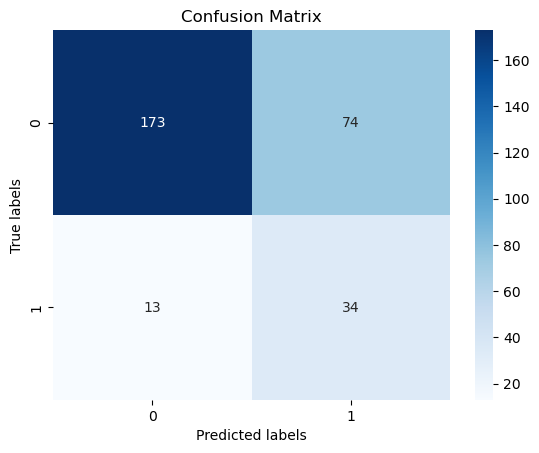

In [18]:
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### LDA model

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score

skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

LDA_model = LinearDiscriminantAnalysis()

sensitivity = []

for train_idx, test_idx in skf.split(X_resampled, y_resampled):
    X_train_fold, X_test_fold = X_resampled[train_idx], X_resampled[test_idx]
    y_train_fold, y_test_fold = y_resampled[train_idx], y_resampled[test_idx]
    
    LDA_model.fit(X_train_fold, y_train_fold)
    
    y_pred = LDA_model.predict(X_test_fold)
    
    rec = recall_score(y_test_fold, y_pred)
    
    sensitivity.append(rec)

print("LDA regression model: \n")
print("Sensitivity of 5-folds:",sensitivity,"(mean sensitivity:",np.mean(sensitivity),")")

LDA regression model: 

Sensitivity of 5-folds: [0.7208121827411168, 0.696969696969697, 0.7918781725888325, 0.751269035532995, 0.751269035532995] (mean sensitivity: 0.7424396246731273 )


In [20]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_resampled, y_resampled)
y_pred = LDA_model.predict(X_test)
sensitivity=recall_score(y_test, y_pred)
error= 1-accuracy_score(y_test, y_pred)
print("Held-out test set sensitivity:", sensitivity)
print("Held-out test set classification error:", error)

Held-out test set sensitivity: 0.723404255319149
Held-out test set classification error: 0.30272108843537415


In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[171  76]
 [ 13  34]]


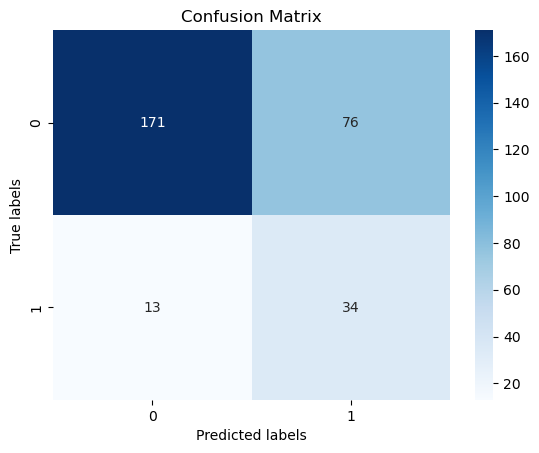

In [22]:
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### KNN model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score,accuracy_score

skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

neighbor=np.arange(3,11)

for i in neighbor:
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    
    sensitivity = []
    
    for train_idx, test_idx in skf.split(X_resampled, y_resampled):
        X_train_fold, X_test_fold = X_resampled[train_idx],X_resampled[test_idx]
        y_train_fold, y_test_fold = y_resampled[train_idx], y_resampled[test_idx]
    
        KNN_model.fit(X_train_fold, y_train_fold)
        
        y_pred = KNN_model.predict(X_test_fold)
    
        rec = recall_score(y_test_fold, y_pred)
    
        sensitivity.append(rec)
        
    print(f"KNN classification model with {i} nighbors: \n")
    print("Sensitivity of 5-folds:",sensitivity,"(mean sensitivity:",np.mean(sensitivity),")")
    print("\n")

KNN classification model with 3 nighbors: 

Sensitivity of 5-folds: [0.9543147208121827, 0.9343434343434344, 0.9238578680203046, 0.9137055837563451, 0.8934010152284264] (mean sensitivity: 0.9239245244321387 )


KNN classification model with 4 nighbors: 

Sensitivity of 5-folds: [0.8730964467005076, 0.8888888888888888, 0.9086294416243654, 0.868020304568528, 0.8375634517766497] (mean sensitivity: 0.875239706711788 )


KNN classification model with 5 nighbors: 

Sensitivity of 5-folds: [0.9137055837563451, 0.9292929292929293, 0.9390862944162437, 0.9035532994923858, 0.8934010152284264] (mean sensitivity: 0.915807824437266 )


KNN classification model with 6 nighbors: 

Sensitivity of 5-folds: [0.8578680203045685, 0.8838383838383839, 0.8934010152284264, 0.8883248730964467, 0.8274111675126904] (mean sensitivity: 0.8701686919961032 )


KNN classification model with 7 nighbors: 

Sensitivity of 5-folds: [0.9035532994923858, 0.9141414141414141, 0.9137055837563451, 0.9187817258883249, 0.86294416

In [24]:
KNN_model = KNeighborsClassifier(n_neighbors=4)
KNN_model.fit(X_resampled, y_resampled)
y_pred = KNN_model.predict(X_test)
sensitivity = recall_score(y_test, y_pred)
error= 1-accuracy_score(y_test, y_pred)
print("Held-out test set sensitivity:", sensitivity)
print("Held-out test set classification error:", error)

Held-out test set sensitivity: 0.2765957446808511
Held-out test set classification error: 0.33333333333333337


In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[183  64]
 [ 34  13]]


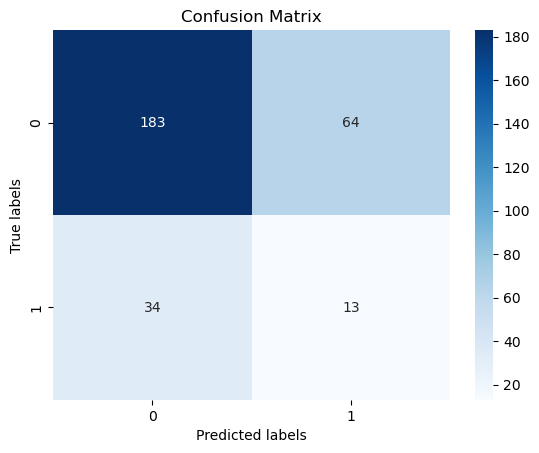

In [26]:
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Decision tree model

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score


DTC_model = DecisionTreeClassifier()

skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

sensitivity = []

for train_idx, test_idx in skf.split(X_resampled, y_resampled):
    X_train_fold, X_test_fold = X_resampled[train_idx], X_resampled[test_idx]
    y_train_fold, y_test_fold = y_resampled[train_idx], y_resampled[test_idx]
    
    DTC_model.fit(X_train_fold, y_train_fold)
    
    y_pred = DTC_model.predict(X_test_fold)
    
    rec = recall_score(y_test_fold, y_pred)
    
    sensitivity.append(rec)
    

print(f"Decision tree classification model : \n")
print("Sensitivity of 5-folds:",sensitivity,"(mean sensitivity:",np.mean(sensitivity),")")

Decision tree classification model : 

Sensitivity of 5-folds: [0.8527918781725888, 0.8333333333333334, 0.8629441624365483, 0.8223350253807107, 0.9035532994923858] (mean sensitivity: 0.8549915397631134 )


In [28]:
from sklearn.tree import DecisionTreeClassifier
DTC_model = DecisionTreeClassifier()
DTC_model.fit(X_resampled, y_resampled)
y_pred = DTC_model.predict(X_test)
sensitivity = recall_score(y_test, y_pred)
error= 1-accuracy_score(y_test, y_pred)
print("Held-out test set sensitivity:", sensitivity)
print("Held-out test set classification error:", error)

Held-out test set sensitivity: 0.2765957446808511
Held-out test set classification error: 0.23469387755102045


In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[212  35]
 [ 34  13]]


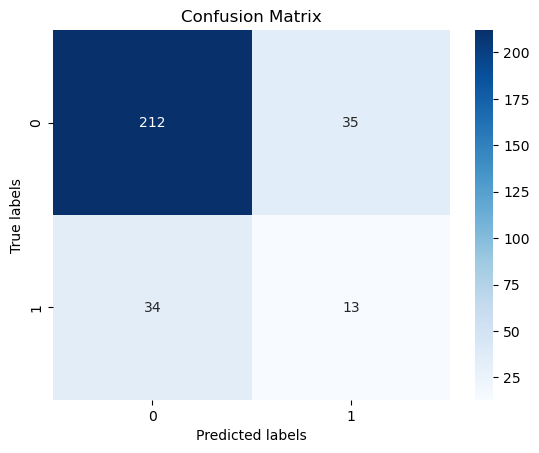

In [30]:
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Random forest model

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

estimators=np.arange(100,550,50)

for i in estimators:
    
    skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
    RFC_model = RandomForestClassifier(n_estimators=i)

    sensitivity = []

    for train_idx, test_idx in skf.split(X_resampled,y_resampled):
        X_train_fold, X_test_fold = X_resampled[train_idx], X_resampled[test_idx]
        y_train_fold, y_test_fold = y_resampled[train_idx], y_resampled[test_idx]


        RFC_model.fit(X_train_fold, y_train_fold)

        y_pred = RFC_model.predict(X_test_fold)
    
        rec = recall_score(y_test_fold, y_pred)
    
        sensitivity.append(rec)

    print(f"Random forest classification model with {i} estimators: \n")
    print("sensitivity of 5-folds:",sensitivity,"(mean sensitivity:",np.mean(sensitivity),")")
    print("\n")

Random forest classification model with 100 estimators: 

sensitivity of 5-folds: [0.9035532994923858, 0.8636363636363636, 0.8629441624365483, 0.868020304568528, 0.9035532994923858] (mean sensitivity: 0.8803414859252424 )


Random forest classification model with 150 estimators: 

sensitivity of 5-folds: [0.8984771573604061, 0.8636363636363636, 0.8934010152284264, 0.868020304568528, 0.8883248730964467] (mean sensitivity: 0.8823719427780341 )


Random forest classification model with 200 estimators: 

sensitivity of 5-folds: [0.9035532994923858, 0.8535353535353535, 0.8578680203045685, 0.8629441624365483, 0.8883248730964467] (mean sensitivity: 0.8732451417730607 )


Random forest classification model with 250 estimators: 

sensitivity of 5-folds: [0.9137055837563451, 0.8585858585858586, 0.8934010152284264, 0.8527918781725888, 0.8883248730964467] (mean sensitivity: 0.8813618417679331 )


Random forest classification model with 300 estimators: 

sensitivity of 5-folds: [0.9086294416243654,

In [32]:
RFC_model = RandomForestClassifier(n_estimators=400)
RFC_model.fit(X_resampled, y_resampled)
y_pred = RFC_model.predict(X_test)
sensitivity = recall_score(y_test, y_pred)
error= 1-accuracy_score(y_test, y_pred)
print("Held-out test set sensitivity:", sensitivity)
print("Held-out test set classification error:", error)

Held-out test set sensitivity: 0.3829787234042553
Held-out test set classification error: 0.15986394557823125


In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[229  18]
 [ 29  18]]


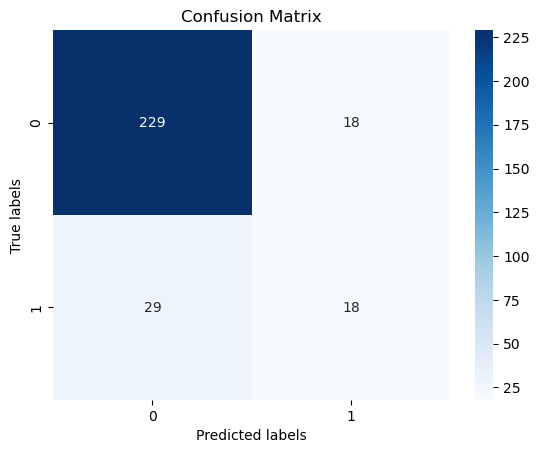

In [34]:
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

* In KNN, DT, RF, the sensitivity is high in cross validation process, but drop significantly in out of sample data, which mean those model can't predict very well on unseen data. This may be cause from resampling the unbalance training data but not resampling the test data. However, it is not recommend to resampling the test data because it represent the real world senario. It may also cause from overfitting, KNN, RF, and DT can capture complex interaction between features and noise, resulting in overfitting.

## Best model LG model: highest sensitivity with relative low classification error

In [35]:
LG_model = LogisticRegression(max_iter=10000)
LG_model.fit(X_resampled, y_resampled)
y_pred = LG_model.predict(X_test)
sensitivity = recall_score(y_test, y_pred)
error= 1-accuracy_score(y_test, y_pred)
print("Held-out test set sensitivity:", sensitivity)
print("Held-out test set classification error:", error)

Held-out test set sensitivity: 0.723404255319149
Held-out test set classification error: 0.29591836734693877


In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[173  74]
 [ 13  34]]


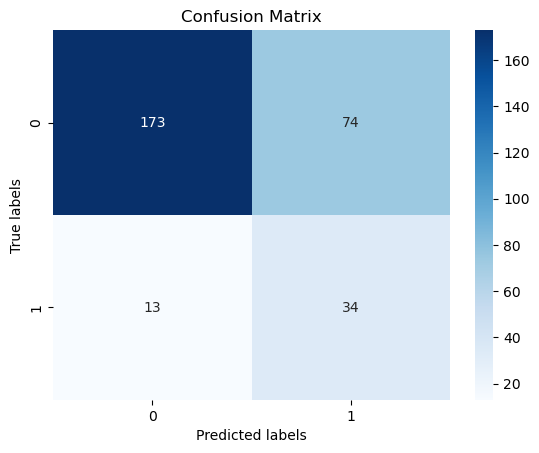

In [37]:
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Best-worst scenario analysis

 **best-worst scenario** for an employee who leaves a company.

|                                  | Best scenario | Worst scenario |
|----------------------------------|---------------|----------------|
| **Cost \($\)**                   | 4,000         | 7,645          |
| **Time to fill a position \(days\)** | 42        | 52             |

Testing the model using a data set containing 294 records, it was able to correctly identify 34 (True Positives) and miss 13 (the False Negatives) from a total of 47 employees who tend to leave. Translating to the best-worst scenario, this means:

|                                  | Best scenario | Worst scenario |
|----------------------------------|---------------|----------------|
| **Total loss prevented \($\)**   | 136000        | 259930         |
| **Total time saved \(days\)**    | 1428          | 1768           |


In addition, **without the model**, the company would have 47 employees that could leave, translating it to **a total loss of \\$ 188,000 in the best scenario and \\$ 359,315 in the worst scenario**.

## Top five factors

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Extract all importance values
importances = rf.feature_importances_

# If X_train is a pandas DataFrame, get feature names, else use a predefined list
feature_names = attrition_data.drop('Attrition_Yes',axis=1).columns

# Sort features based on importance
sorted_indices = np.argsort(importances)
sorted_importances = importances[sorted_indices][::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices][::-1]

In [46]:
# Calculate the sum of importance values
total_importance = sum(sorted_importances)

# Calculate the percentage contribution of the top 5 features
top_n = 5
top_n_importance = sum(sorted_importances[:top_n])
top_n_percentage = (top_n_importance / total_importance) * 100

print(f"Percentage contribution of the top {top_n} features: {top_n_percentage:.2f}%")


Percentage contribution of the top 5 features: 45.85%


C:\Users\lanpa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lanpa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lanpa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\lanpa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_d

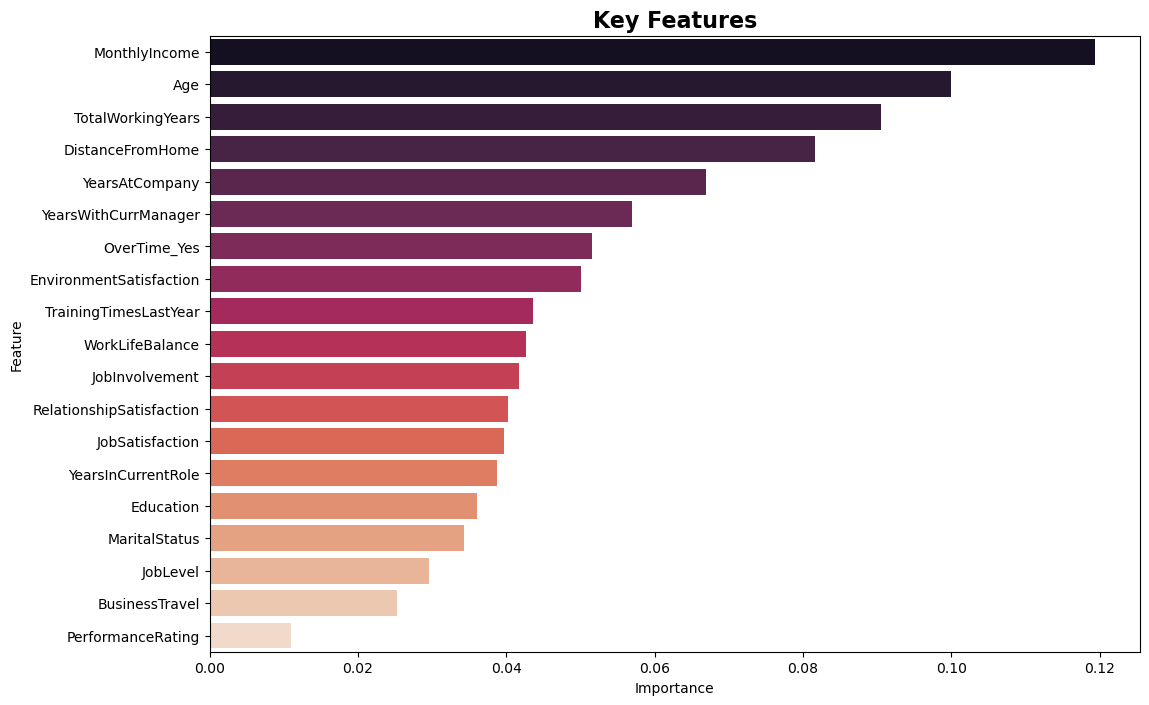

In [47]:
# Plotting
import matplotlib.pyplot as plt

# Create a list of colors. Set the color for the bottom five features to 'red', and the rest to 'skyblue'.
colors = ['red' if i >= len(sorted_importances) - 5 else 'skyblue' for i in range(len(sorted_importances))]

plt.figure(figsize=(12, 8))
sns.barplot(x = sorted_importances ,y= sorted_feature_names , palette='rocket')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title("Key Features", fontsize=16, fontweight="bold")
plt.show()

* Top five factors are monthly income, age, total working years, distance from home, and years at company. If company wants to reduce turnover rate, company should take care of these factors. To be more specific, talk to those employees who earn less, are older, working less year, far from company and working less years in company.

# Result

* The best model is logistic regression model, the model could result in savings ranging from 136,000 to 259,930 and a time reduction of 1,428 to 1,768 days.

* The top five factors are monthly income, age, total working years, distance from home, and years at company.